# 8-2. **Whisper**

In [1]:
!pip install -q git+https://github.com/openai/whisper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00


In [2]:
import whisper
import librosa
import librosa.display
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Audio anaysis

In [3]:
!wget https://raw.githubusercontent.com/kimtwan/NLP_lecture/master/data/audio1.mp3
audio_file = 'audio1.mp3'

--2023-10-17 02:27:55--  https://raw.githubusercontent.com/kimtwan/NLP_lecture/master/data/audio1.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445962 (436K) [audio/mpeg]
Saving to: ‘audio1.mp3’

audio1.mp3          100%[===================>] 435.51K  --.-KB/s    in 0.01s   

2023-10-17 02:27:56 (31.7 MB/s) - ‘audio1.mp3’ saved [445962/445962]



<ipython-input-6-e6705f3f3aae>:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(x, sr=sr, ax=ax[0], x_axis='time')


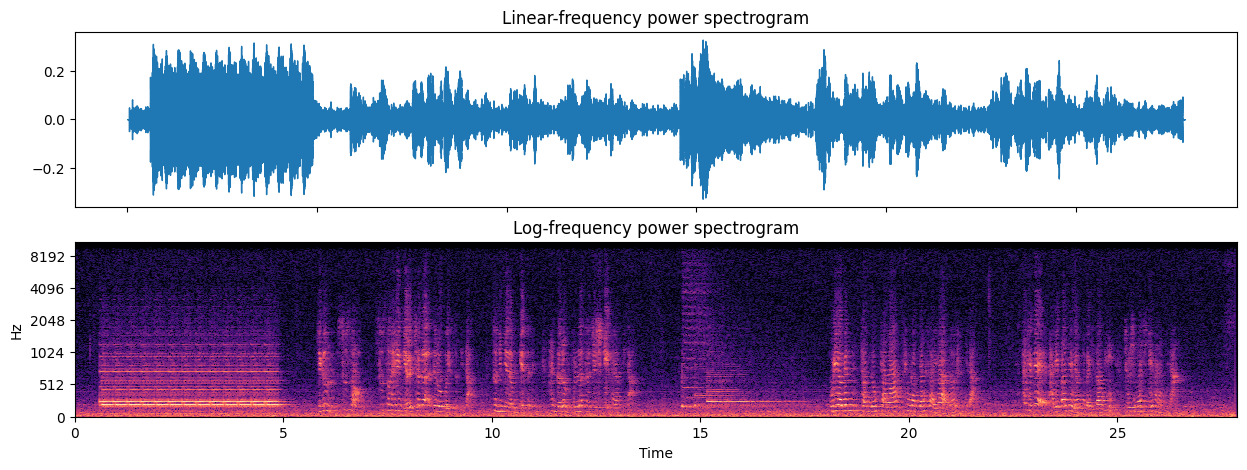

In [6]:
## analyze audio with librosa
x, sr = librosa.load(audio_file)
fig, ax = plt.subplots(figsize=(15, 5), nrows=2, ncols=1, sharex=False)

librosa.display.waveshow(x, sr=sr, ax=ax[0], x_axis='time')
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=160)), ref=np.max)
tmp = librosa.display.specshow(D, y_axis='mel', sr=sr, hop_length=160, x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
# fig.colorbar(tmp, ax=ax[1], format="%+2.f dB")
plt.plot()

import IPython.display as ipd
ipd.Audio(audio_file) # load a local WAV file

## Load model

In [7]:
## load model
model = whisper.load_model("base")
print(f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
      f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters.")

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 63.6MiB/s]


Model is multilingual and has 71,825,920 parameters.


In [8]:
## load audio and pad/trim it to fit 30
audio_raw = whisper.load_audio(audio_file)
audio = whisper.pad_or_trim(audio_raw)

print('%s -> %s'%(audio.shape,audio.shape))
print('max value: %s'%audio.max())
print('min value: %s'%audio.min())

(480000,) -> (480000,)
max value: 0.29589844
min value: -0.32940674


torch.Size([80, 3000])
tensor([-0.8257, -0.8257, -0.8257,  ..., -0.8257, -0.8257, -0.8257],
       device='cuda:0')
max value: 0.29589844
min value: -0.32940674


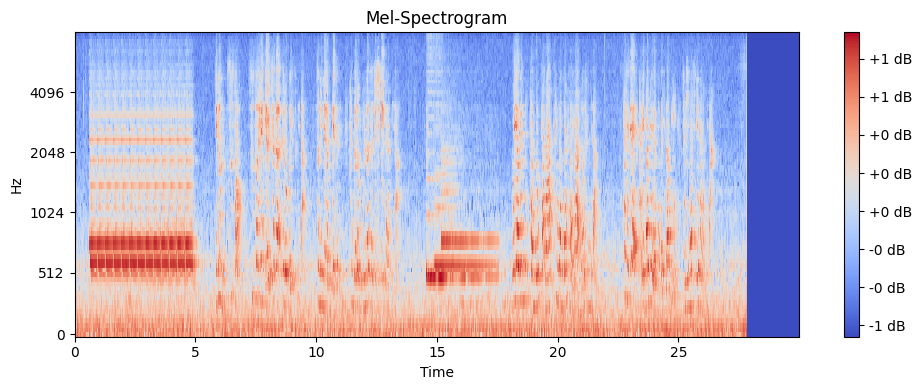

In [9]:
## make log-Mel spectrogram and move to the same device as the model
melspectrogram = whisper.log_mel_spectrogram(audio).to(model.device)

print(melspectrogram.shape)
print(melspectrogram[0])
print('max value: %s'%audio.max())
print('min value: %s'%audio.min())

# plot log_melspectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrogram.cpu().numpy(), y_axis='mel', x_axis='time', sr=16000, hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

## ASR

In [10]:
## run ASR
# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, melspectrogram, options)

# print the recognized text
print(result.text)

지금 수소, 수소행 열차가 들어오고 있습니다. 손님 여러분께서는 한 걸음 물러져 주시기 바랍니다. 우리 옆엔 단독장와 생강장사위가 너를습니다.
